In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Histogram of Q 4.5.c

In [2]:
f = pd.DataFrame([26.1,24.5,24.8,24.5,24.1,24.3,26.4,24.9,23.7,23.5,24.0,24.1,23.7,24.3,26.6,24.6,24.8,24.4,26.8,25.2])
f.head()

,0
0,26.1
1,24.5
2,24.8
3,24.5
4,24.1


In [3]:
h=2.3*stats.iqr(f[0],interpolation='midpoint')/(len(f)**(1/3)) # interval
(f[0].max()-f[0].min())/h # bins

4.09957809371315

In [4]:
x = np.arange(f[0].min()-1, f[0].max()+1, 0.1)

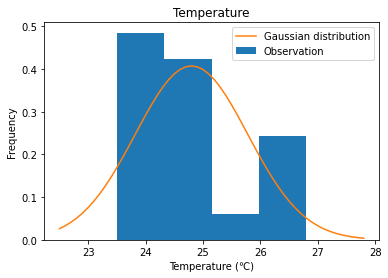

In [5]:
f.hist(bins=4, label='Observation', density=True)
plt.plot(x, stats.norm.pdf(x, 24.8, 0.98), label='Gaussian distribution') # average = 24.8, std = 0.98
plt.xlabel('Temperature (℃)')
plt.ylabel('Frequency')
plt.title('Temperature')
plt.legend()
plt.grid(False)
plt.show()

# Q 4.7.c

In [6]:
f2 = pd.read_excel('Table 4.8.xlsx')
f2.head()

,Year,Precipitation (in)
0,1951,4.17
1,1952,5.61
2,1953,3.88
3,1954,1.55
4,1955,2.30


In [7]:
alpha = 3.783
beta  = 0.934 

In [8]:
h2=2.3*stats.iqr(f2['Precipitation (in)'],interpolation='midpoint')/(len(f2)**(1/3)) # interval
(f2['Precipitation (in)'].max()-f2['Precipitation (in)'].min())/h2 # bins

4.130110287416931

In [9]:
x2 = np.arange(f2['Precipitation (in)'].min()-1, f2['Precipitation (in)'].max()+1, 0.1)

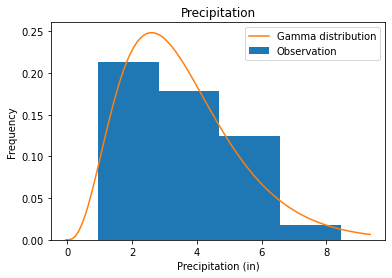

In [10]:
f2['Precipitation (in)'].hist(bins=4, label='Observation', density=True)
plt.plot(x2, stats.gamma.pdf(x2, alpha, 0, beta), label='Gamma distribution') # average = 24.8, std = 0.98
plt.xlabel('Precipitation (in)')
plt.ylabel('Frequency')
plt.title('Precipitation')
plt.legend()
plt.grid(False)
plt.show()

# Q 4.11

In [11]:
A1 = pd.read_excel('A-1.xlsx', header=[0,1])
A1.tail()

Date        Ithaca                     Canandaigua           \
   Unnamed: 0_level_1 precipitation Max Temp Min Temp Precipitation Max Temp   
28                 29         0.010    27.00    -4.00         0.010    28.00   
29                 30         0.030    30.00    11.00         0.010    31.00   
30                 31         0.050    34.00    23.00         0.130    38.00   
31           sum/avg.         3.150    29.87    13.00         2.400    31.77   
32          std. dev.         0.243     7.71    13.62         0.168     7.86   

             
   Min Temp  
28    14.00  
29    14.00  
30    23.00  
31    20.23  
32     8.81

In [12]:
A1.iloc[0:31].tail()

Date        Ithaca                     Canandaigua           \
   Unnamed: 0_level_1 precipitation Max Temp Min Temp Precipitation Max Temp   
26                 27          0.00     17.0    -11.0          0.00     19.0   
27                 28          0.00     26.0     -4.0          0.00     26.0   
28                 29          0.01     27.0     -4.0          0.01     28.0   
29                 30          0.03     30.0     11.0          0.01     31.0   
30                 31          0.05     34.0     23.0          0.13     38.0   

             
   Min Temp  
26      7.0  
27      8.0  
28     14.0  
29     14.0  
30     23.0

In [13]:
A1.iloc[0:31].loc[:,'Canandaigua'].mean()

Precipitation     0.077419
Max Temp         31.774194
Min Temp         20.225806
dtype: float64

In [14]:
A1.iloc[0:31].loc[:,'Canandaigua'].std()

Precipitation    0.167650
Max Temp         7.864306
Min Temp         8.807988
dtype: float64

In [15]:
A1.iloc[0:31].loc[:,'Canandaigua'].loc[:,'Max Temp':].cov() # defauld ddof = 1 

,Max Temp,Min Temp
Max Temp,61.847312,56.119355
Min Temp,56.119355,77.580645


In [16]:
# So, covariance with Max temperature and Min temperature is 56.12F

# Q 4.12

In [17]:
import scipy.stats as stats
f.head()

,0
0,26.1
1,24.5
2,24.8
3,24.5
4,24.1


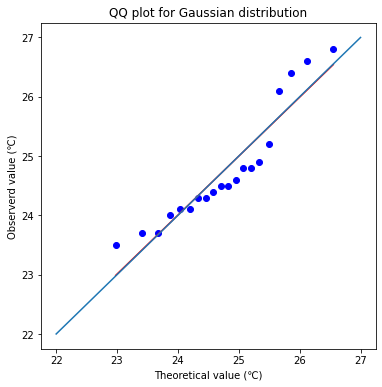

In [18]:
fig, ax = plt.subplots(figsize = (6,6))
stats.probplot(f[0], dist='norm', plot=ax, sparams=(f[0].mean(),f[0].std(ddof=1)))
plt.title('QQ plot for Gaussian distribution')
plt.plot([22,27],[22,27])
plt.xlabel('Theoretical value (℃)')
plt.ylabel('Observerd value (℃)')
plt.show()